# Homework #4  (Due date: 15th of December, 23:59)
- Download the Mall Customer Segmentation Data from the github repository below (or you can directly use the one attached in the assignment.)
- Use only 3 features (Age, Income and Spending Score) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k) and comment on plots. 
- Again with the same 3 features, scatter your data in a 3D plot. Coloring of samples should denote the determined categories (your optimum k). I.e. we should be able to distinguish the samples of k categories. Comment on optimum k value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

In [2]:
import pandas as pd
!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git
df = pd.read_csv("./DATA602Datasets/Mall_Customers.csv")
df.head(3)

Cloning into 'DATA602Datasets'...
remote: Enumerating objects: 72, done.
remote: Total 72 (delta 0), reused 0 (delta 0), pack-reused 72
Unpacking objects: 100% (72/72), done.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
customer_df = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
display(customer_df)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


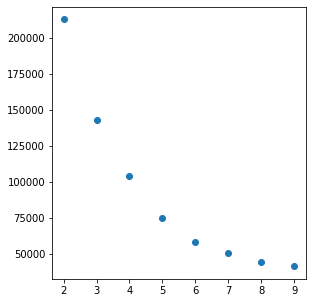

In [4]:
scores = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(customer_df)
  scores.append( -kmeans.score(customer_df) )
  
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot([k for k in range(2,10)], scores, 'o')


Looking at the graph, we see that when we increase the number of clusters from two to three, from three to four, and from four to five, the error drops significantly. But when we increase the number of clusters more than five, the error does not decrease significantly. Therefore, it would be appropriate to choose the number of clusters as five.

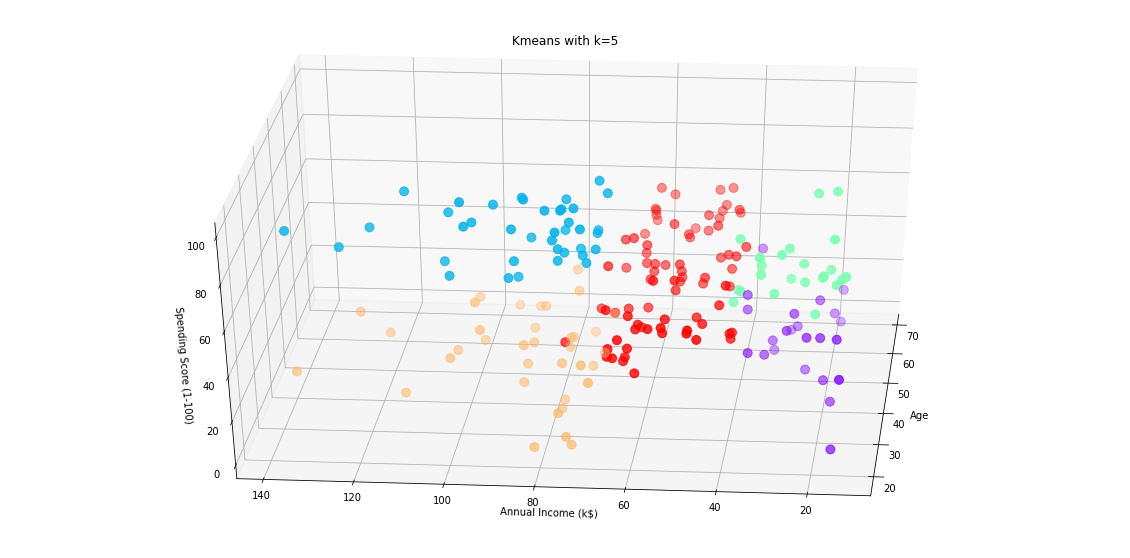

In [9]:
n_clusters=5 # I found the number of clusters with the elbow method
y_pred = KMeans(n_clusters=n_clusters).fit_predict(customer_df) #fit unsupervised learning model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection ="3d") # In order to plot 3d graph
ax.scatter3D(np.array(customer_df["Age"]),np.array(customer_df["Annual Income (k$)"]),np.array(customer_df["Spending Score (1-100)"]), c=y_pred, cmap= plt.cm.rainbow_r, s = 80)
plt.title("Kmeans with k=" + str(n_clusters))
ax.view_init(35, 185) #I changed the angle of the axes to see the clusters more clearly.
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()



Although there are some outliers, we can get a proper grouping when we divide the data into five categories with three features.

REFERENCES:

https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py : I benefited from this site to scatter 3d plot graph

https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/ : I benefited from this site to scatter 3d plot graph

I benefited from lecture presentations and sample codes covered in the course.